## 230968364 Week4
### Exercise 2

### 1. Perform the preprocessing if required, scale the train and test data using standard scaler. 
### 2. Split the dataset into train size of 70% and test size of 30% and Apply the Ridge and Lasso regression and fit the model containing all independent variables. 
### 3. Make predictions on test data “HousePriceTest.csv” and tabulate performance of both models on unseen data.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("D:\\MIT\\ML\\LAB\\week4\\Housing.csv")
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

X = df.drop(columns=['price'])
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [15]:
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Ridge Regression on Test Data:")
print(f"MAE: {ridge_mae}, R2: {ridge_r2}")
print("\nLasso Regression on Test Data:")
print(f"MAE: {lasso_mae}, R2: {lasso_r2}")

test_results = pd.DataFrame({
    "Actual Price": y_test,
    "Ridge Predictions": ridge_pred,
    "Lasso Predictions": lasso_pred
})
print("\nPredictions on Test Data:")
print(test_results.head())

Ridge Regression on Test Data:
MAE: 925321.661769564, R2: 0.6435873962422457

Lasso Regression on Test Data:
MAE: 925543.549345872, R2: 0.6435419499267118

Predictions on Test Data:
     Actual Price  Ridge Predictions  Lasso Predictions
316       4060000       5.404598e+06       5.407509e+06
77        6650000       7.093049e+06       7.097185e+06
360       3710000       3.057362e+06       3.055463e+06
90        6440000       4.478215e+06       4.476945e+06
493       2800000       3.319543e+06       3.315984e+06


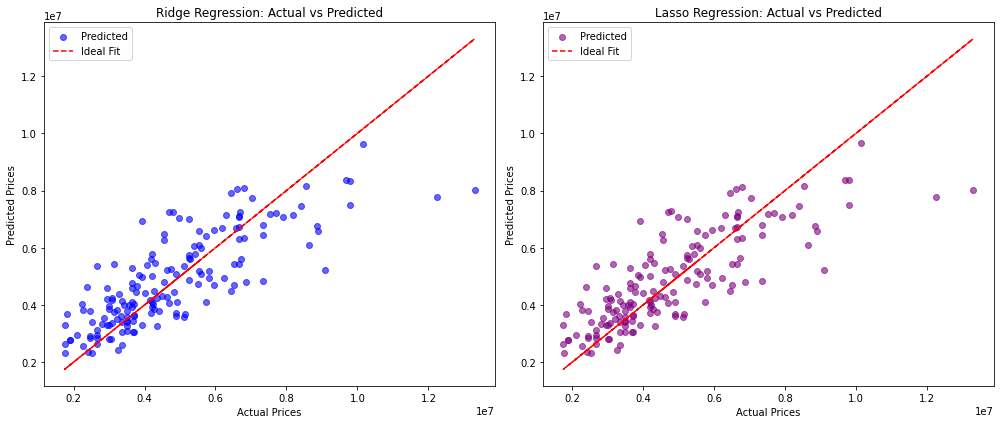

In [17]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Fit')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, color='purple', alpha=0.6, label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Fit')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

plt.tight_layout()
plt.show()

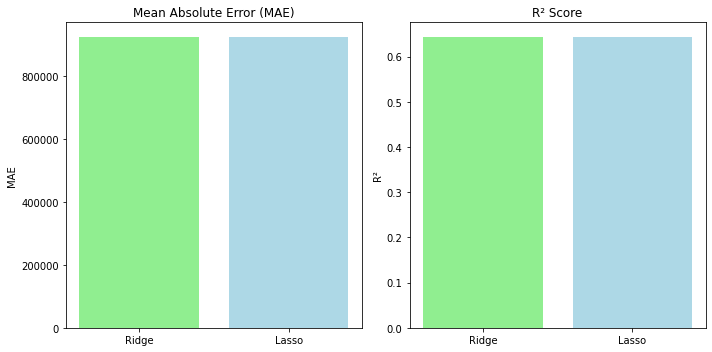

In [20]:
models = ['Ridge', 'Lasso']
mae_values = [ridge_mae, lasso_mae]
r2_values = [ridge_r2, lasso_r2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color=['lightgreen', 'lightblue'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['lightgreen', 'lightblue'])
plt.title('R² Score')
plt.ylabel('R²')

plt.tight_layout()
plt.show()